In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [338]:
df = pd.read_csv("brain_Stroke.csv")

In [339]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [340]:
X = df[['age', 'heart_disease','avg_glucose_level', 'bmi']]
Y = df['stroke']

# K-Nearest Neighbour (KNN)

In [341]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [342]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [343]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [344]:
KNN.score(X_train, Y_train)

0.9513052208835341

In [345]:
KNN.score(X_test, Y_test)

0.9518555667001003

# Linear Regression

In [346]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [347]:
X = df[["age"]]
y = df["avg_glucose_level"]

In [348]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2)
lr = LinearRegression()

In [349]:
lr.fit(X_train, Y_train)

LinearRegression()

In [350]:
lr.score(X_train, Y_train)

0.04988479077768848

In [351]:
lr.score(X_test, Y_test)

0.0715305495950056

In [352]:
y_pred = lr.predict(X_test)

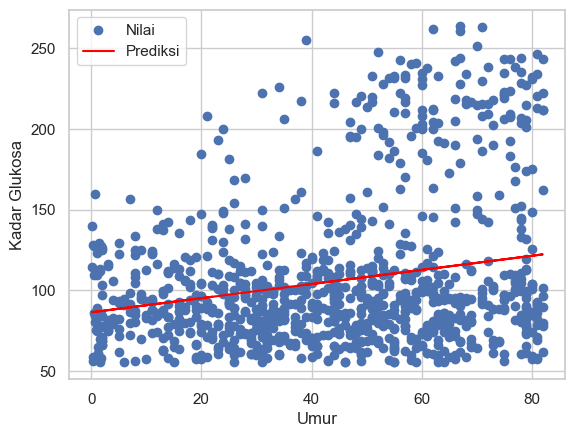

In [353]:
plt.scatter(X_test, Y_test,label ="Nilai")
plt.plot(X_test,y_pred, color ="Red", label = "Prediksi")
plt.xlabel("Umur")
plt.ylabel("Kadar Glukosa")
plt.legend()

# Naive Bayes

In [384]:
gs = GaussianNB()

In [385]:
gs.fit(X_train, Y_train)

GaussianNB()

In [386]:
gs.score(X_train, Y_train)

0.9533132530120482

In [387]:
gs.score(X_test, Y_test)

0.9378134403209629

# Classification (Confusion Matrix)

In [388]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

modelKNN = KNeighborsClassifier(n_neighbors = 5)
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [389]:
lr.fit(X_train, Y_train)

LinearRegression()

In [395]:
y_pred = modelKNN.predict(X_test)
x_pred = gs.predict(X_test)

In [396]:
confusion_matrix(Y_test, y_pred)

array([[943,  10],
       [ 44,   0]], dtype=int64)

In [397]:
confusion_matrix(Y_test, x_pred)

array([[953,   0],
       [ 44,   0]], dtype=int64)

# Perbandingan Score Antara Model KNN dengan Naive Bayes

In [414]:
KNN.fit(X_train, Y_train)
modelKNN = KNN.score(X_test, Y_test)

gs.fit(X_train, Y_train)
modelgs = gs.score(X_test, Y_test)

In [415]:
modelKNN = (modelKNN*100)
modelgs = (modelgs*100)

accuracy = [modelKNN, modelgs]
Label = ["K-Nearest Neighbour", "Naive Bayes"]

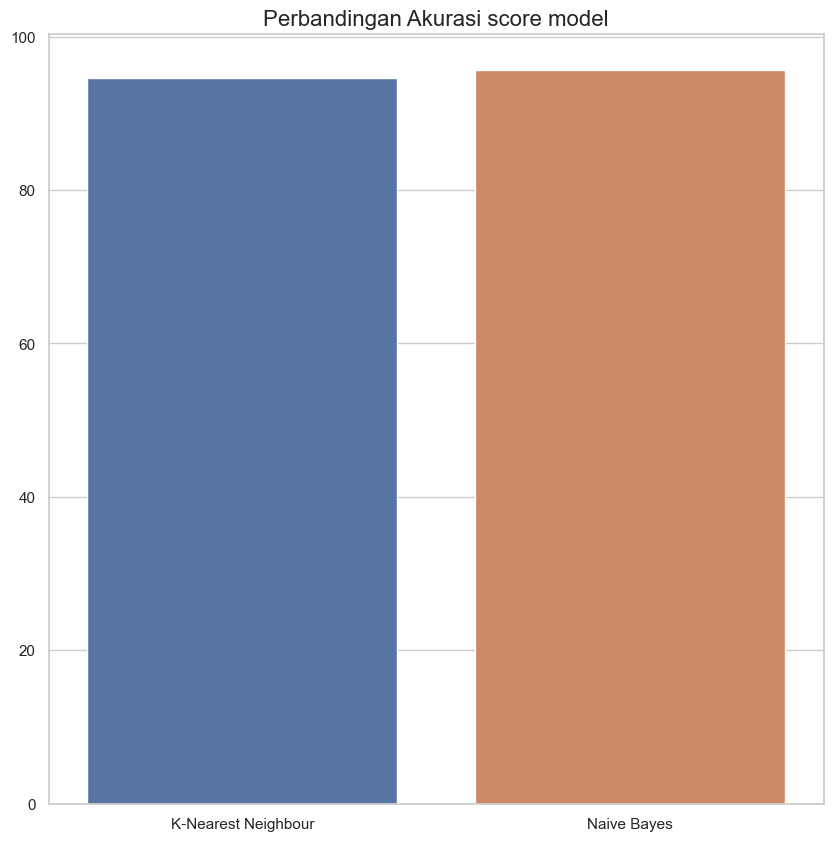

In [420]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.barplot(x=Label, y=accuracy)
plt.title("Perbandingan Akurasi score model", size=16)
plt.show()